### MBAN 6110 Assignment 1

### Objective:
1. What conclusions can you draw about sales performance of various products and regions?
2. What recommendations do you have for the business?
3. Describe your data cleaning approach. How and why did you decide on which cleaning techniques to use?

#### Perform data cleaning and describe why and how you clean the data
1. Drop the duplicates by using drop_duplicates since the repeated row does not add any meaningful information towards our study. It is better for us to drop them up front the cleaning process.
2. Cacluate the mode for the Product and Region, and then we could use the mode to fill missing values apeared in both of Product and Region columns. using mode to impute is because the more a specific product appears, means the more units sold of that product, in another, more welcome. Similar idea for the the region, if a region appears the most, then that region is probably being more attracted by the products sold by the company.
3. Lastly, calculate the mean value for the price and units sold. Impute the mean for missing value in price and Units sold respectively.

##### Import the package

In [1]:
import pandas as pd
import numpy as np

##### Import the dataset 'sales_data.csv' as dt using pandas.read_csv

In [2]:
dt = pd.read_csv("/Users/jiawenli/Desktop/MBAN_6110T/Assignment_1/sales_data.csv")
dt.head(10)

,Product,Region,Price,Units Sold,Sale Date
0,NaN,Region_1,72.87,10.0,2022-01-01
1,Product_40,Region_2,46.19,10.0,2022-01-02
2,Product_1,Region_5,NaN,4.0,2022-01-03
3,Product_6,Region_8,143.47,8.0,2022-01-04
4,Product_44,Region_4,122.54,10.0,2022-01-05
5,Product_21,Region_8,15.76,20.0,2022-01-06
6,Product_31,Region_10,1.60,11.0,2022-01-07
7,NaN,NaN,NaN,11.0,2022-01-08
8,Product_20,Region_8,9.55,8.0,2022-01-09
9,Product_34,Region_1,58.88,NaN,2022-01-10


In [3]:
# Get the general info of the dataset
dt.describe(include='all')

,Product,Region,Price,Units Sold,Sale Date
count,947,942,945.000000,943.000000,1050
unique,50,10,NaN,NaN,1000
top,Product_4,Region_5,NaN,NaN,2023-07-31
freq,30,112,NaN,NaN,2
mean,NaN,NaN,108.628011,10.200424,NaN
std,NaN,NaN,167.350086,3.247589,NaN
min,NaN,NaN,0.190000,2.000000,NaN
25%,NaN,NaN,26.420000,8.000000,NaN
50%,NaN,NaN,64.640000,10.000000,NaN
75%,NaN,NaN,142.310000,12.000000,NaN


In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      942 non-null    object 
 2   Price       945 non-null    float64
 3   Units Sold  943 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


## 1. Data cleaning process

##### Sort the data by 'Product' and 'Sale date' using ascending order, store the new dataset with a new name called 'dt_new'

In [5]:
#Sort the data by product and sale date using ascending order
dt_new = dt.sort_values(['Product','Sale Date'], ascending=True, ignore_index=True)
print(dt_new)

        Product     Region   Price  Units Sold   Sale Date
0     Product_1   Region_5     NaN         4.0  2022-01-03
1     Product_1   Region_3   72.55        17.0  2022-03-25
2     Product_1   Region_4    7.97         9.0  2022-05-17
3     Product_1   Region_5   20.43         9.0  2022-09-11
4     Product_1   Region_1  125.89        13.0  2022-09-16
...         ...        ...     ...         ...         ...
1045        NaN   Region_6    2.24         9.0  2024-08-16
1046        NaN  Region_10  197.65         NaN  2024-08-20
1047        NaN   Region_4  154.03        12.0  2024-08-30
1048        NaN   Region_2   14.33        11.0  2024-09-04
1049        NaN   Region_7   10.80         8.0  2024-09-26

[1050 rows x 5 columns]


Drop the duplicates

In [6]:
dt_new.drop_duplicates(inplace=True)
dt_new.reset_index(inplace=True)

In [7]:
dt_new.isnull().sum()

index           0
Product       101
Region        100
Price         100
Units Sold    100
Sale Date       0
dtype: int64

From the table above, we could see that the total missing values in each column. We have 101 missing values for product, 100 for region, 100 for price, 100 for units sold, 0 for sale date, and 0 for year.

##### Let's take a look at the Product variable

In [8]:
dt_new['Product'].unique()

array(['Product_1', 'Product_10', 'Product_11', 'Product_12',
       'Product_13', 'Product_14', 'Product_15', 'Product_16',
       'Product_17', 'Product_18', 'Product_19', 'Product_2',
       'Product_20', 'Product_21', 'Product_22', 'Product_23',
       'Product_24', 'Product_25', 'Product_26', 'Product_27',
       'Product_28', 'Product_29', 'Product_3', 'Product_30',
       'Product_31', 'Product_32', 'Product_33', 'Product_34',
       'Product_35', 'Product_36', 'Product_37', 'Product_38',
       'Product_39', 'Product_4', 'Product_40', 'Product_41',
       'Product_42', 'Product_43', 'Product_44', 'Product_45',
       'Product_46', 'Product_47', 'Product_48', 'Product_49',
       'Product_5', 'Product_50', 'Product_6', 'Product_7', 'Product_8',
       'Product_9', nan], dtype=object)

In [9]:
pd.value_counts(dt_new['Product'].unique()).sum()

50

Based on the ouput above, there were 50 unique Products in total for sale. They were Product_1, Product_2, .... , Product_50.

##### Let us take a look at the Region column

In [10]:
dt_new['Region'].unique()

array(['Region_5', 'Region_3', 'Region_4', 'Region_1', 'Region_7',
       'Region_6', nan, 'Region_10', 'Region_8', 'Region_2', 'Region_9'],
      dtype=object)

In [11]:
pd.value_counts(dt_new['Region'].unique()).sum()

10

Based on the array and number 10 above, we know that there were 10 Regions in total where the products were sold. They were Region_1, Region_2, ..., Region_10.

We could extract the year from the column 'Sale Date', and then add a new column called year next to the 'Sale Date' column. That way, we only need the year that the product is being sold.

Extracting year from the sale date column would make it easier to do calculations by simply grouping years.

In [12]:
dt_new['Year'] = dt_new['Sale Date'].str[0:4]

In [13]:
dt_new

,index,Product,Region,Price,Units Sold,Sale Date,Year
0,0,Product_1,Region_5,NaN,4.0,2022-01-03,2022
1,1,Product_1,Region_3,72.55,17.0,2022-03-25,2022
2,2,Product_1,Region_4,7.97,9.0,2022-05-17,2022
3,3,Product_1,Region_5,20.43,9.0,2022-09-11,2022
4,4,Product_1,Region_1,125.89,13.0,2022-09-16,2022
...,...,...,...,...,...,...,...
996,1045,NaN,Region_6,2.24,9.0,2024-08-16,2024
997,1046,NaN,Region_10,197.65,NaN,2024-08-20,2024
998,1047,NaN,Region_4,154.03,12.0,2024-08-30,2024
999,1048,NaN,Region_2,14.33,11.0,2024-09-04,2024


##### After I created a new column, I will impute all of the missing values for all the columns. The reason I do not want to drop any of the records is because the amount of the rows containing missing value is relative high. Dropping it would probably lead to problems afterward.

#### For the 'Product' column, I am going to impute the missing value. The way I am using to impute is, take a look at which products were the best seller (or appeared the most)

In [14]:
dt_new['Product'].describe()

count           900
unique           50
top       Product_4
freq             28
Name: Product, dtype: object

In [15]:
dt_new['Product'].mode()

0    Product_24
1     Product_4
Name: Product, dtype: object

Based on the result above, we can see the top seller product is between Product_24 and Product_4. Product_4 has the highest number of sale.

##### Now, we could fill the missing value in column 'Product' with Product_4.

In [16]:
# To fill the missing value in Product column with Product_43
dt_new['Product'] = dt_new['Product'].fillna('Product_4')

In [17]:
# Check the missing value for each column again
dt_new.isnull().sum()

index           0
Product         0
Region        100
Price         100
Units Sold    100
Sale Date       0
Year            0
dtype: int64

In [18]:
dt_new.head()

,index,Product,Region,Price,Units Sold,Sale Date,Year
0,0,Product_1,Region_5,NaN,4.0,2022-01-03,2022
1,1,Product_1,Region_3,72.55,17.0,2022-03-25,2022
2,2,Product_1,Region_4,7.97,9.0,2022-05-17,2022
3,3,Product_1,Region_5,20.43,9.0,2022-09-11,2022
4,4,Product_1,Region_1,125.89,13.0,2022-09-16,2022


In [19]:
dt_new.tail()

,index,Product,Region,Price,Units Sold,Sale Date,Year
996,1045,Product_4,Region_6,2.24,9.0,2024-08-16,2024
997,1046,Product_4,Region_10,197.65,NaN,2024-08-20,2024
998,1047,Product_4,Region_4,154.03,12.0,2024-08-30,2024
999,1048,Product_4,Region_2,14.33,11.0,2024-09-04,2024
1000,1049,Product_4,Region_7,10.80,8.0,2024-09-26,2024


##### Next, we need to impute the Region column. I use the mode function that returns the most appeared region in the region column, then impute the missing value with that specific region.

In [20]:
dt_new['Region'].describe()

count          901
unique          10
top       Region_5
freq           109
Name: Region, dtype: object

In [21]:
dt_new['Region'].mode()

0    Region_5
Name: Region, dtype: object

It appears that Region_5 has the hghest occurence. Then, I am going to use it to impute the missing value for the region column.

In [22]:
dt_new['Region'] = dt_new['Region'].fillna('Region_5')

In [23]:
dt_new.isnull().sum()

index           0
Product         0
Region          0
Price         100
Units Sold    100
Sale Date       0
Year            0
dtype: int64

In [24]:
dt_new['Price'].describe()

count     901.000000
mean      108.922597
std       169.931751
min         0.190000
25%        26.870000
50%        66.410000
75%       141.150000
max      2636.900000
Name: Price, dtype: float64

Since the mean value for the price column is 108.9.
I am going to impute the missing value in price column with mean value of 108.9

In [25]:
dt_new['Price'].fillna(round(108.922597, 2), inplace=True)

Then, we calculate the mean value for the 'Units Sold' column.

In [26]:
dt_new['Units Sold'].describe()

count    901.000000
mean      10.173141
std        3.267175
min        2.000000
25%        8.000000
50%       10.000000
75%       12.000000
max       22.000000
Name: Units Sold, dtype: float64

Since the mean value is 10.17, we will use this value to impute the missing value in the 'Units Sold' column.

In [27]:
dt_new['Units Sold'].fillna(round(10.173141), inplace=True)

The next step is to double check the dataset, and ensure there is no missing value left untreated in the dataframe.

In [28]:
dt_new.isnull().sum()

index         0
Product       0
Region        0
Price         0
Units Sold    0
Sale Date     0
Year          0
dtype: int64

Now, isnull().sum() function tells us that there is no missing value left in the dataset.

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Generate business insights
Answer the following questions
1. Which products have the highest number of purchase (which were the best seller?)
2. Which region sells best (has the highest sell)
3. Which products made more money for the company?
4. Which season has the highest number of sale?
5. Based on the information, what would you recommend to the company on its next year sales?

### 1. Which products have the highest number of purchase (which were the best seller?)

In [30]:
''' Calculate which products have the highest number of purchase, 
    and store it in a dataframe named dt_a1'''
dt_a1 = pd.DataFrame(dt_new.groupby('Product')['Units Sold'].sum())
dt_a1

,Units Sold
Product,
Product_1,201.0
Product_10,222.0
Product_11,149.0
Product_12,142.0
Product_13,181.0
Product_14,146.0
Product_15,215.0
Product_16,161.0
Product_17,206.0


Find out which product has the hghest units sold and which one has the lowest

In [31]:
dt_a1['Units Sold'].max()

1274.0

The max number of units sold is 1274.

In [32]:
# The highest unit sold is 1274. Let's find out the corresponding product.
dt_a1[dt_a1['Units Sold']==1274]

,Units Sold
Product,
Product_4,1274.0


### The answer is that Product_4 has the highest number of sale. Meaning Product_4 is the best seller. We should definitely sell more product_4.

In [33]:
# Find out the mean of unit sold based on each product
dt_a1['Units Sold'].mean()

203.32

Find out which were the products that had their number of units sold above the mean(above 203).

In [34]:
dt_a1[dt_a1['Units Sold'] >= 203]

,Units Sold
Product,
Product_10,222.0
Product_15,215.0
Product_17,206.0
Product_19,214.0
Product_23,238.0
Product_24,299.0
Product_3,205.0
Product_38,206.0
Product_4,1274.0


In [35]:
dt_a1[dt_a1['Units Sold'] >= 203].count()

Units Sold    14
dtype: int64

The result above shows that we have 14 products in total that is above the mean units sold. They were product number 10, 15, 17, 19 23, 24, 3, 38, 4, 40, 42, 43, 49, and 8.

In [36]:
list = [10, 15, 17, 19, 23, 24, 3, 38, 4, 40, 42, 43, 49, 8]
list.sort()
list

[3, 4, 8, 10, 15, 17, 19, 23, 24, 38, 40, 42, 43, 49]

#### The company should focus on the products that are in the list below:
#### [3, 4, 8, 10, 15, 17, 19, 23, 24, 38, 40, 42, 43, 49]
#### In addition, product_4 has the highest units sold among all which is 1274 units sold in total.

### 2. Which region sells best (has the highest sell)

In [37]:
dt_a2 = pd.DataFrame(dt_new.groupby('Region')['Units Sold'].sum())
dt_a2

,Units Sold
Region,
Region_1,882.0
Region_10,852.0
Region_2,973.0
Region_3,802.0
Region_4,898.0
Region_5,2069.0
Region_6,861.0
Region_7,910.0
Region_8,974.0


#### We could see that Region_5 has the highest units sold which is 2069 that is nearly 2 times more than the units sold in other regions.
#### So, the company should definitely sell more of their products in region_5.

### 3. Which products made more money for the company?

In [38]:
''' extract 'Product', 'Price', 'Units Sold' from the cleaned dataset of dt_new,
    then store them into the new dataset named dt_a3'''
dt_a3 = dt_new[['Product', 'Price', 'Units Sold']]
dt_a3

,Product,Price,Units Sold
0,Product_1,108.92,4.0
1,Product_1,72.55,17.0
2,Product_1,7.97,9.0
3,Product_1,20.43,9.0
4,Product_1,125.89,13.0
...,...,...,...
996,Product_4,2.24,9.0
997,Product_4,197.65,10.0
998,Product_4,154.03,12.0
999,Product_4,14.33,11.0


In [39]:
# Add a new column that calculates the product of price and units sold in each row
dt_a3['Money_inflow'] = np.array(dt_a3['Price'])*np.array(dt_a3['Units Sold'])
dt_a3

/var/folders/zj/_4td97xs5m5_42chzkdpgsch0000gn/T/ipykernel_55316/2495716333.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_a3['Money_inflow'] = np.array(dt_a3['Price'])*np.array(dt_a3['Units Sold'])


,Product,Price,Units Sold,Money_inflow
0,Product_1,108.92,4.0,435.68
1,Product_1,72.55,17.0,1233.35
2,Product_1,7.97,9.0,71.73
3,Product_1,20.43,9.0,183.87
4,Product_1,125.89,13.0,1636.57
...,...,...,...,...
996,Product_4,2.24,9.0,20.16
997,Product_4,197.65,10.0,1976.50
998,Product_4,154.03,12.0,1848.36
999,Product_4,14.33,11.0,157.63


In [40]:
# Find out which products has the highest money inflow for the company.
dt_a3_m = pd.DataFrame(dt_a3.groupby('Product')['Money_inflow'].sum())
dt_a3_m

,Money_inflow
Product,
Product_1,21492.25
Product_10,22750.11
Product_11,15750.58
Product_12,12742.43
Product_13,17462.25
Product_14,16308.78
Product_15,19229.21
Product_16,11600.16
Product_17,23729.25


In [41]:
dt_a3_m.describe()

,Money_inflow
count,50.000000
mean,22565.577200
std,22548.516876
min,8676.280000
25%,14409.055000
50%,17822.715000
75%,21437.767500
max,167081.200000


#### We could see that the highest amount of money inflow for the company is $167,081.2

In [42]:
dt_a3_m[dt_a3_m['Money_inflow'] == 167081.200000]

,Money_inflow
Product,
Product_4,167081.2


### Let's see how much money was made by all the products in each year

In [43]:
dt_year_moneyin = dt_new[['Year', 'Price', 'Units Sold']]

In [44]:
dt_year_moneyin['Money_inflow'] = np.array(dt_year_moneyin['Price'])*np.array(dt_year_moneyin['Units Sold'])

/var/folders/zj/_4td97xs5m5_42chzkdpgsch0000gn/T/ipykernel_55316/3463798985.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_year_moneyin['Money_inflow'] = np.array(dt_year_moneyin['Price'])*np.array(dt_year_moneyin['Units Sold'])


In [45]:
dt_year_moneyin = pd.DataFrame(dt_year_moneyin.groupby('Year')['Money_inflow'].sum())
dt_year_moneyin.reset_index()

,Year,Money_inflow
0,2022,387003.15
1,2023,460579.53
2,2024,280696.18


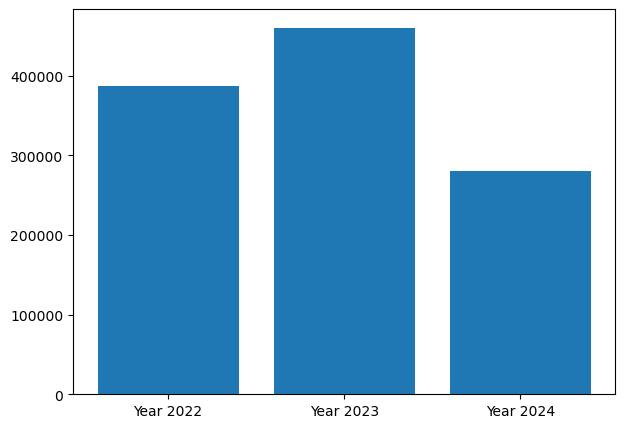

In [46]:
years = ['Year 2022', 'Year 2023', 'Year 2024']
Money_inflow = [387003.15, 460579.53, 280696.18]
plt.figure(figsize=(7,5))
plt.bar(years, Money_inflow)
plt.show()

#### Based on the above chart, we could see that year 2023 has the highest money inflow. The performance is the best when it was in 2023. In 2024, the performance went down a lot.

#### We figured out that product_4 has made the most money inflow for the company. Recall: product_4 also had the highest sale/units sold among all products. Also, 2023 was the year where the sale performance was the best.

#### 4. Which season has the highest number of sale?

#### Lastly, we want to see which season has the highest number of sale?

In [47]:
''' use iterrows to go through each row of the dataframe.
    In our case, since the dataframe is not huge, we could use iterrows() instead of apply()'''
for index, row in dt_new.iterrows():
    print(str(index) + ':' + row['Sale Date'])

0:2022-01-03
1:2022-03-25
2:2022-05-17
3:2022-09-11
4:2022-09-16
5:2022-10-02
6:2022-10-28
7:2023-01-27
8:2023-02-01
9:2023-05-23
10:2023-06-07
11:2023-07-05
12:2023-09-02
13:2023-09-29
14:2023-10-14
15:2023-11-15
16:2024-01-02
17:2024-03-14
18:2024-03-18
19:2024-06-07
20:2022-03-11
21:2022-03-31
22:2022-06-14
23:2022-09-04
24:2022-11-13
25:2022-11-28
26:2023-01-20
27:2023-03-06
28:2023-03-16
29:2023-04-19
30:2023-06-13
31:2023-08-02
32:2023-08-27
33:2023-10-02
34:2023-11-01
35:2023-11-18
36:2024-01-11
37:2024-03-17
38:2024-05-04
39:2024-09-05
40:2022-04-02
41:2022-05-13
42:2022-05-25
43:2022-06-08
44:2022-08-11
45:2022-11-12
46:2022-12-26
47:2023-03-03
48:2023-10-27
49:2024-01-21
50:2024-04-21
51:2024-05-14
52:2024-05-29
53:2022-02-16
54:2022-10-17
55:2022-11-29
56:2023-06-01
57:2023-06-21
58:2023-07-27
59:2023-08-01
60:2023-09-22
61:2023-12-14
62:2024-03-08
63:2024-04-10
64:2024-06-23
65:2024-08-04
66:2022-01-22
67:2022-01-30
68:2022-04-21
69:2022-06-28
70:2022-08-25
71:2022-09-15
72

In [48]:
# Create a new column 'Sale Season' for dt_new based on column'Sale Date'
for index, row in dt_new.iterrows():
    dt_new.loc[index, 'Sale_Season'] = row['Sale Date'][5:7]
dt_new

,index,Product,Region,Price,Units Sold,Sale Date,Year,Sale_Season
0,0,Product_1,Region_5,108.92,4.0,2022-01-03,2022,01
1,1,Product_1,Region_3,72.55,17.0,2022-03-25,2022,03
2,2,Product_1,Region_4,7.97,9.0,2022-05-17,2022,05
3,3,Product_1,Region_5,20.43,9.0,2022-09-11,2022,09
4,4,Product_1,Region_1,125.89,13.0,2022-09-16,2022,09
...,...,...,...,...,...,...,...,...
996,1045,Product_4,Region_6,2.24,9.0,2024-08-16,2024,08
997,1046,Product_4,Region_10,197.65,10.0,2024-08-20,2024,08
998,1047,Product_4,Region_4,154.03,12.0,2024-08-30,2024,08
999,1048,Product_4,Region_2,14.33,11.0,2024-09-04,2024,09


In [49]:
dt_new = pd.DataFrame(dt_new)
dt_new.head()

,index,Product,Region,Price,Units Sold,Sale Date,Year,Sale_Season
0,0,Product_1,Region_5,108.92,4.0,2022-01-03,2022,01
1,1,Product_1,Region_3,72.55,17.0,2022-03-25,2022,03
2,2,Product_1,Region_4,7.97,9.0,2022-05-17,2022,05
3,3,Product_1,Region_5,20.43,9.0,2022-09-11,2022,09
4,4,Product_1,Region_1,125.89,13.0,2022-09-16,2022,09


In [50]:
# Replace value of sale month with its corresponding season.
for index, row in dt_new.iterrows():
    if dt_new.loc[index, 'Sale_Season'] in ['12','01','02']:
        dt_new.loc[index, 'Sale_Season'] = 'Winter'
    elif dt_new.loc[index, 'Sale_Season'] in ['03','04','05']:
        dt_new.loc[index, 'Sale_Season'] = 'Spring'
    elif dt_new.loc[index, 'Sale_Season'] in ['06','07','08']:
        dt_new.loc[index, 'Sale_Season'] = 'Summer'
    elif dt_new.loc[index, 'Sale_Season'] in ['09','10','11']:
        dt_new.loc[index, 'Sale_Season'] = 'Fall'

In [51]:
dt_new.head(10)

,index,Product,Region,Price,Units Sold,Sale Date,Year,Sale_Season
0,0,Product_1,Region_5,108.92,4.0,2022-01-03,2022,Winter
1,1,Product_1,Region_3,72.55,17.0,2022-03-25,2022,Spring
2,2,Product_1,Region_4,7.97,9.0,2022-05-17,2022,Spring
3,3,Product_1,Region_5,20.43,9.0,2022-09-11,2022,Fall
4,4,Product_1,Region_1,125.89,13.0,2022-09-16,2022,Fall
5,5,Product_1,Region_5,441.99,10.0,2022-10-02,2022,Fall
6,6,Product_1,Region_7,62.99,13.0,2022-10-28,2022,Fall
7,8,Product_1,Region_3,108.92,9.0,2023-01-27,2023,Winter
8,9,Product_1,Region_6,50.97,10.0,2023-02-01,2023,Winter
9,10,Product_1,Region_5,111.42,10.0,2023-05-23,2023,Spring


##### Now, we have assigned each row with its corresponding season based on the month of sale date in each row.

In [52]:
#  Group by 'Sale_Season' and see which products are being sold in what season.
dt_s = pd.DataFrame(dt_new.groupby('Sale_Season')['Units Sold'].sum())
dt_s.reset_index()

,Sale_Season,Units Sold
0,Fall,2031.0
1,Spring,2930.0
2,Summer,2758.0
3,Winter,2447.0


#### We could see that products were being sold best in spring, then summer, followed by winter, and fall being the least.
#### Spring had 2930 units sold. Summer had 2758 units sold.

In [53]:
# Group by year and product to see hwo sale performance was in different year
dt_y = pd.DataFrame(dt_new.groupby(['Year','Product'])['Units Sold'].sum())
dt_y.reset_index(inplace=True)
dt_y

,Year,Product,Units Sold
0,2022,Product_1,75.0
1,2022,Product_10,72.0
2,2022,Product_11,62.0
3,2022,Product_12,31.0
4,2022,Product_13,86.0
...,...,...,...
145,2024,Product_50,32.0
146,2024,Product_6,45.0
147,2024,Product_7,70.0
148,2024,Product_8,77.0


In [54]:
dt_new['Units Sold'].sum()

10166.0

In [55]:
# Figure out which products has the highest units sold for each year
dt_y.groupby('Year')['Units Sold'].max()

Year
2022    564.0
2023    482.0
2024    228.0
Name: Units Sold, dtype: float64

In [56]:
dt_y[(dt_y['Year']=='2022') & (dt_y['Units Sold']==564)]

,Year,Product,Units Sold
33,2022,Product_4,564.0


In [57]:
dt_y[(dt_y['Year']=='2023') & (dt_y['Units Sold']==482)]

,Year,Product,Units Sold
83,2023,Product_4,482.0


In [58]:
dt_y[(dt_y['Year']=='2024') & (dt_y['Units Sold']==228)]

,Year,Product,Units Sold
133,2024,Product_4,228.0


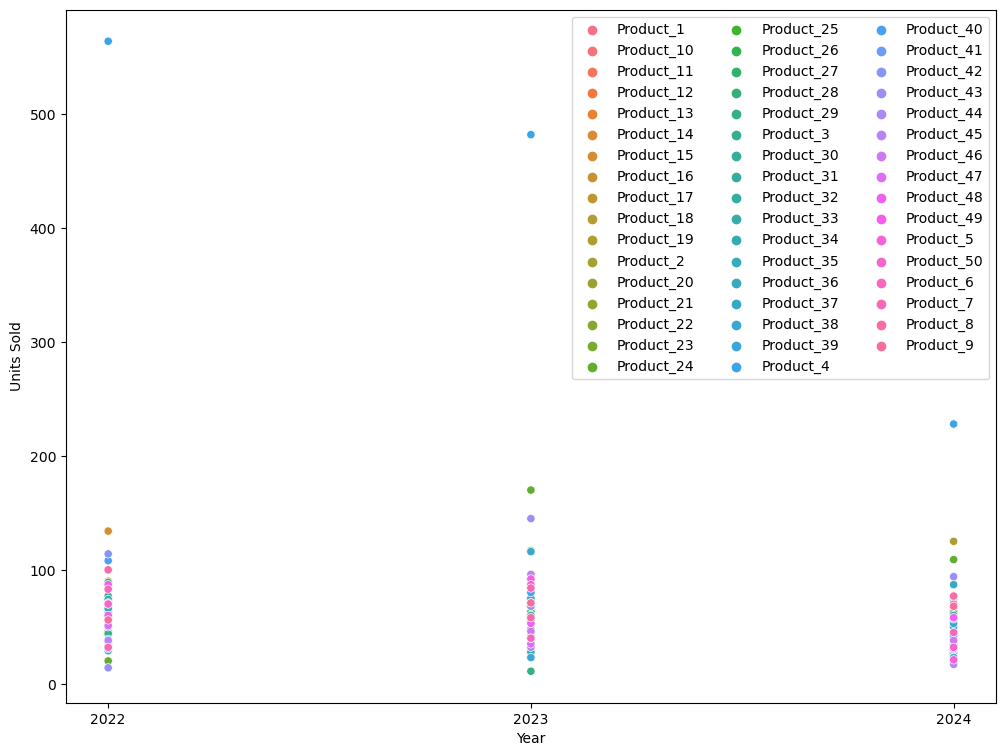

In [59]:
plt.figure(figsize=(12,9))
sns.scatterplot(x='Year', y='Units Sold', data=dt_y, hue='Product')
plt.legend(ncol=3)

### We could see that the Product_4 was always the best seller from 2022 to 2024. However, the number of units sold of product_4 was deceasing from year to year. 

### Conclusion & Recommendation:

### 1. Product_4 was the best seller, it had the highest units sold among all of the products which were 1274 units sold in total.

### 2. The company should focus on the products that are in the list below: [product 3, product 4, product 8, product 10, product 15, product 17, 19, 23, 24, 38, 40, 42, 43, 49]. Focusing on these products and made adjustments on price and product itself would potentially bring huge benefits in the future.

### 3. Region 5 has the highest units sold which is 2069. Therefore, the company should definitely sell more of their products in region 5. The company could set up a targeted marketing startegy towards region 5 since region 5 did have the potential to become a long-term loyal customer sources.

### 4. The year 2023 has the highest money inflow. Meaning the performance is the best when it was in 2023. In 2024, the performance went down a lot. Also, it is imporatnt to know that product 4 has made the most money inflow for the company. The company could look more into the strategy they had for year 2023. Adjust the price for all of the products, the overall sale performance went down for a reason, it could be the price were higher than what the consumer was anticipating. It could be there was something bad happened in the global economy or an economy recession took place.

### 5. Spring had the highest amount of units sold. The number was 2930 in units sold in spring. Summer had the second most which were 2758 units sold, followed by winter, and lastly, fall. The company could turn their eye and focus on spring and summer. A detailed market research might be helpful as well.